In [70]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
data = pd.read_csv(r'C:\Users\Imad\Desktop\ML\ML\Classification\Support Vector Machine\hep.csv')

In [72]:
data.head()

,DIE,AGE,SEX,TEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,NaN,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,200,4,NaN,1


In [73]:
data.columns = data.columns.str.strip()

In [74]:
data = data.replace('?', np.nan)

In [75]:
data.head()

,DIE,AGE,SEX,TEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,200,4,NaN,1


In [76]:
data = data.dropna()

In [77]:
data.head()

,DIE,AGE,SEX,TEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


In [79]:
data = data.apply(pd.to_numeric)

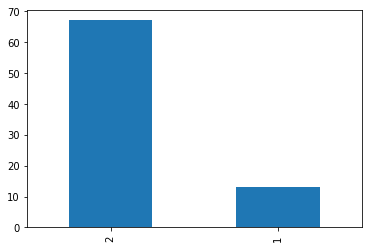

In [165]:
data['DIE'].value_counts()
data["DIE"].value_counts().plot.bar()

In [144]:
data['DIE'].value_counts()

2    67
1    13
Name: DIE, dtype: int64

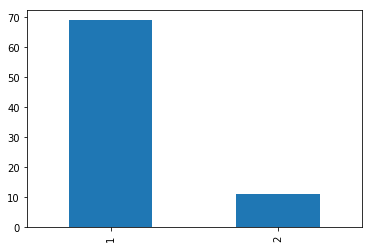

In [81]:
data["SEX"].value_counts().plot.bar()
plt.show()

In [82]:
data.columns

Index(['DIE', 'AGE', 'SEX', 'TEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [96]:
X = data[['AGE', 'SEX', 'TEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY']].values
X[0:10]

array([[ 34. ,   1. ,   2. ,   2. ,   2. ,   2. ,   2. ,   2. ,   2. ,
          2. ,   2. ,   2. ,   2. ,   0.9,  95. ,  28. ,   4. ,  75. ,
          1. ],
       [ 39. ,   1. ,   1. ,   1. ,   2. ,   2. ,   2. ,   1. ,   1. ,
          2. ,   2. ,   2. ,   2. ,   1.3,  78. ,  30. ,   4.4,  85. ,
          1. ],
       [ 32. ,   1. ,   2. ,   1. ,   1. ,   2. ,   2. ,   2. ,   1. ,
          2. ,   1. ,   2. ,   2. ,   1. ,  59. , 249. ,   3.7,  54. ,
          1. ],
       [ 41. ,   1. ,   2. ,   1. ,   1. ,   2. ,   2. ,   2. ,   1. ,
          2. ,   2. ,   2. ,   2. ,   0.9,  81. ,  60. ,   3.9,  52. ,
          1. ],
       [ 30. ,   1. ,   2. ,   2. ,   1. ,   2. ,   2. ,   2. ,   1. ,
          2. ,   2. ,   2. ,   2. ,   2.2,  57. , 144. ,   4.9,  78. ,
          1. ],
       [ 38. ,   1. ,   1. ,   2. ,   1. ,   1. ,   1. ,   2. ,   2. ,
          2. ,   2. ,   1. ,   2. ,   2. ,  72. ,  89. ,   2.9,  46. ,
          1. ],
       [ 40. ,   1. ,   1. ,   2. ,   1. ,   2. ,   

In [117]:
y = data['DIE'].values
y[0:80]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1], dtype=int64)

In [99]:
from sklearn import preprocessing #normalize

In [100]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.59437209, -0.3992747 ,  0.95118973,  0.59660054,  1.36277029,
         0.79539491,  0.42008403,  0.4404882 ,  0.95118973,  0.48038446,
         0.67419986,  0.42008403,  0.37796447, -0.36936917, -0.14831805,
        -0.75929992,  0.27284058,  0.53638413, -0.83793058],
       [-0.14831424, -0.3992747 , -1.05131497, -1.67616342,  1.36277029,
         0.79539491,  0.42008403, -2.27020839, -1.05131497,  0.48038446,
         0.67419986,  0.42008403,  0.37796447,  0.09054575, -0.46697925,
        -0.73119072,  0.97131247,  0.96592097, -0.83793058],
       [-0.77279523, -0.3992747 ,  0.95118973, -1.67616342, -0.73379939,
         0.79539491,  0.42008403,  0.4404882 , -1.05131497,  0.48038446,
        -1.4832397 ,  0.42008403,  0.37796447, -0.25439044, -0.82313001,
         2.34676733, -0.25101333, -0.36564324, -0.83793058],
       [ 0.0301089 , -0.3992747 ,  0.95118973, -1.67616342, -0.73379939,
         0.79539491,  0.42008403,  0.4404882 , -1.05131497,  0.48038446,
         0.674

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (64, 19) (64,)
Test set: (16, 19) (16,)


In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [178]:
yhat = neigh.predict(X_test)
yhat[0:6]

array([2, 2, 2, 2, 2, 2], dtype=int64)

In [179]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.921875
Test set Accuracy:  0.9375


In [180]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.90625
Test set Accuracy:  0.875


In [181]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.875 , 0.875 , 0.9375, 0.9375, 0.875 , 0.875 , 0.875 , 0.8125,
       0.8125])

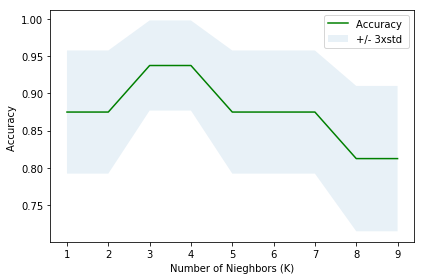

In [182]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nieghbors (K)')
plt.tight_layout()
plt.show()

In [183]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9375 with k= 3
